<a href="https://colab.research.google.com/github/Akfotty7/Akfotty7/blob/main/CNN_AtoZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=52db28a9bdc90a8e97d2fdc42134498ecd0e7f4f53756cc933ec626c10a62f09
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [ ]:
dataset = pd.read_csv("/content/A_Z Handwritten Data.csv").astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

# Splite data the X - Our data , and y - the prdict label
X = dataset.drop('label',axis = 1)
y = dataset['label']

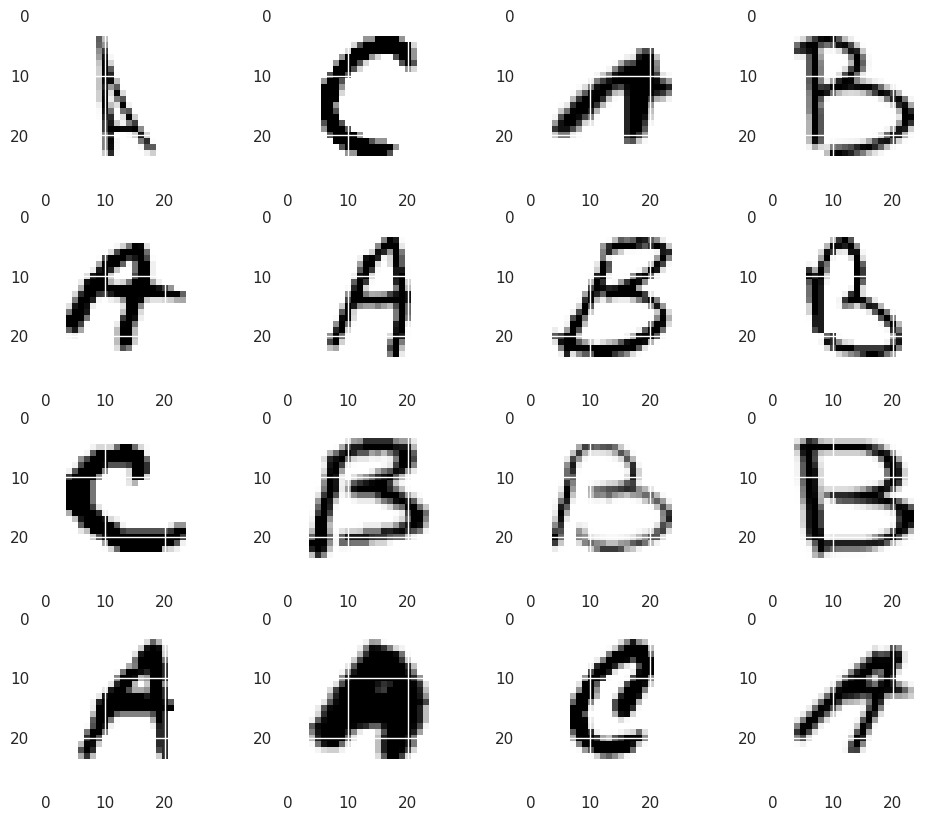

In [ ]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

IndexError: ignored

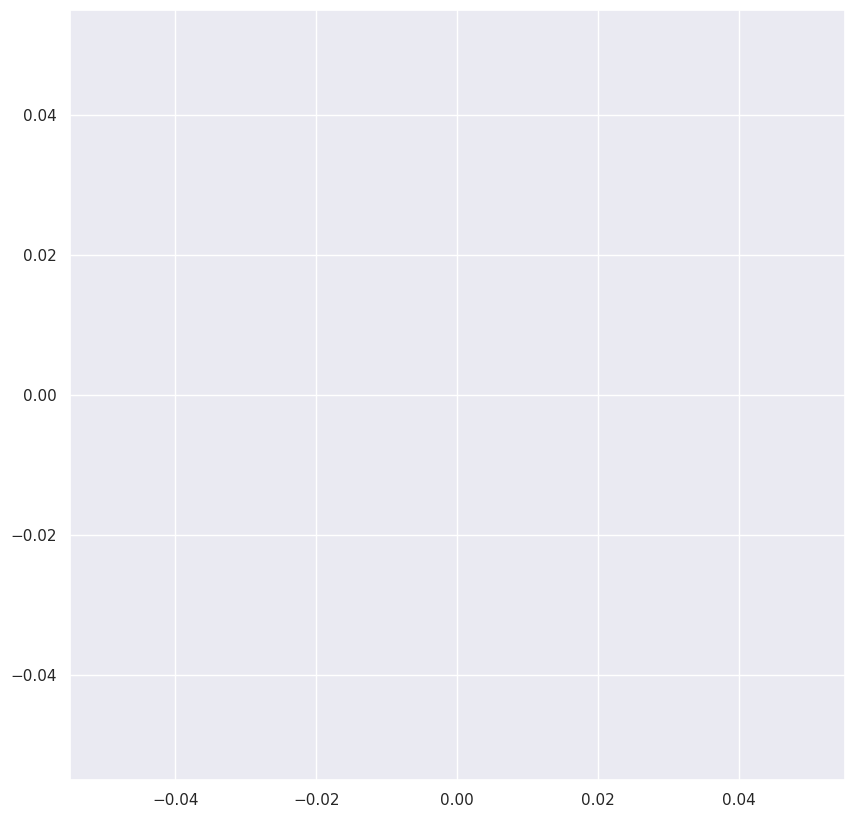

In [ ]:
#Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

print("We have very low observations for I and F ")
print("I count:", label_size['I'])
print("F count:", label_size['F'])

In [ ]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

Data after scaler


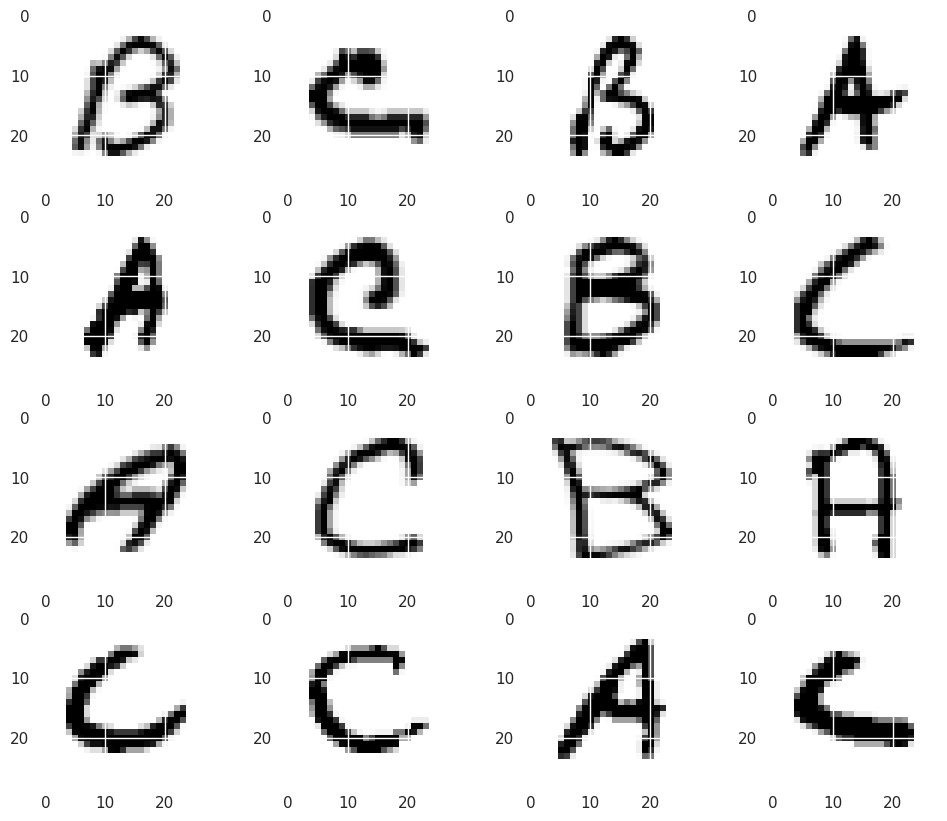

In [ ]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2, 2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(128, activation='relu'))
cls.add(Dense(len(y.unique()), activation='softmax'))

cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

scores = cls.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Epoch 1/18
138/138 - 20s - loss: 0.0921 - accuracy: 0.9706 - val_loss: nan - val_accuracy: 0.9940 - 20s/epoch - 143ms/step
Epoch 2/18
138/138 - 17s - loss: 0.0174 - accuracy: 0.9951 - val_loss: nan - val_accuracy: 0.9964 - 17s/epoch - 125ms/step
Epoch 3/18
138/138 - 15s - loss: 0.0110 - accuracy: 0.9971 - val_loss: nan - val_accuracy: 0.9979 - 15s/epoch - 110ms/step
Epoch 4/18
138/138 - 15s - loss: 0.0090 - accuracy: 0.9977 - val_loss: nan - val_accuracy: 0.9986 - 15s/epoch - 109ms/step
Epoch 5/18
138/138 - 17s - loss: 0.0064 - accuracy: 0.9983 - val_loss: nan - val_accuracy: 0.9988 - 17s/epoch - 124ms/step
Epoch 6/18
138/138 - 15s - loss: 0.0062 - accuracy: 0.9980 - val_loss: nan - val_accuracy: 0.9979 - 15s/epoch - 112ms/step
Epoch 7/18
138/138 - 16s - loss: 0.0043 - accuracy: 0.9988 - val_loss: nan - val_accuracy: 0.9977 - 16s/epoch - 113ms/step
Epoch 8/18
138/138 - 15s - loss: 0.0040 - accuracy: 0.9987 - val_loss: nan - val_accuracy: 0.9987 - 15s/epoch - 109ms/step
Epoch 9/18
138/1

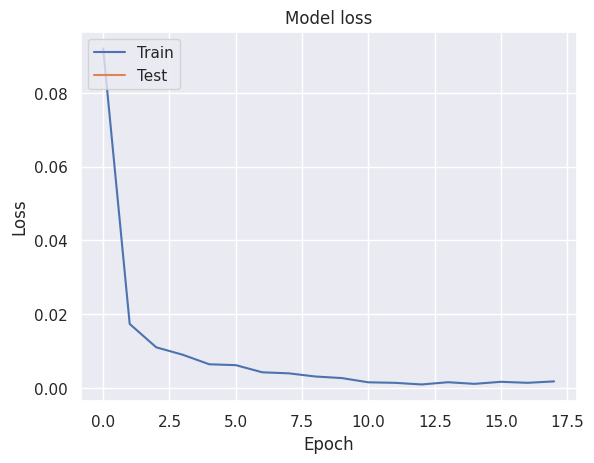

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

287/287 [==============================] - 2s 7ms/step


<Axes: >

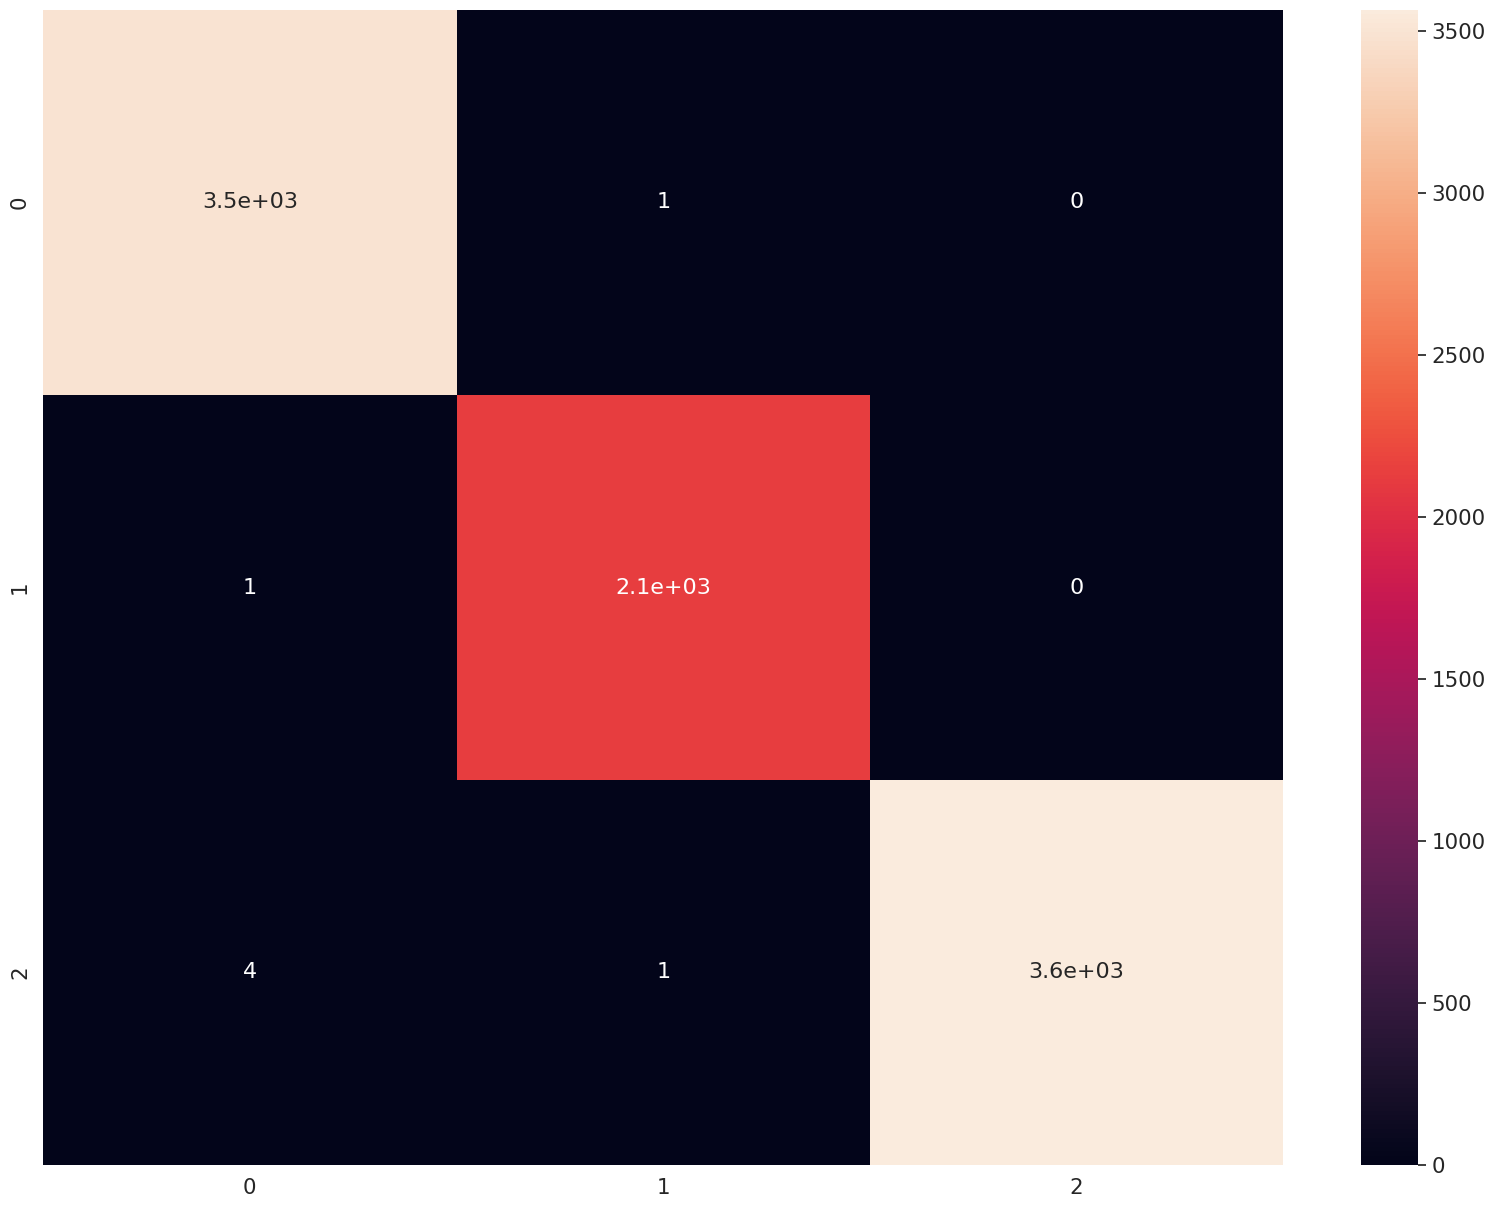

In [ ]:
cm=confusion_matrix(y_test.argmax(axis=1),cls.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(3),range(3))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size